# INM707: Advanced Individual Tasks

This is for running Rainbow DQN using RLlib on an Atari environment.

Repository: https://github.com/fatimahmirza/Individual-taskINM707

In [ ]:
!pip install gymnasium[atari] autorom[accept-rom-license]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 12.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.1 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446659 sha256=089b06db9ca263e54f15d1592d9b5e02a7b7f75d0ce7de7c2e0ed56b6bd18706
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


In [ ]:
!pip install ray[rllib]==2.21.0 gputil

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 MB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.5 MB/s eta 0:00:00
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7394 sha256=5bcc5a95af47b9d318ff48bfe104f3e166eebec84df5f34157652df473c4a0bb
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built gputil
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 0.29.1
    Uninstalling gymnasium-0.29.1:
      Successfully uninstalled gymnasium-0.29.1


In [ ]:
import ray.rllib.algorithms.dqn as dqn
from ray import tune

config = dqn.DQNConfig()

# Rainbow DQN Parameters
# combines all these to improve the stability and performance
config["dueling"] = True
config["double_q"] = True
# implement of noisy network
config["noisy"] = True
config["n_step"] = 3
config["v_min"] = -10.0
config["v_max"] = 10.0
config["sigma0"] = 0.5
config["num_atoms"] = 51

# https://docs.ray.io/en/latest/_modules/ray/rllib/utils/replay_buffers/prioritized_replay_buffer.html
replay_config = {
                "type": "MultiAgentPrioritizedReplayBuffer",
                "capacity": 30000,
                "prioritized_replay_alpha": 0.5,
                "prioritized_replay_beta": 0.5,
                "prioritized_replay_eps": 3e-6,
                "replay_sequence_length" : 1
            }

config["replay_buffer_config"] = replay_config
config["gamma"] = 0.99
config["train_batch_size"] = 64
config["timesteps_per_iteration"] = 1000
config["target_network_update_freq"] = 800
config["num_gpus"] = 1 # Change to number of gpus (could be 0)
config["model"] = {"fcnet_hiddens": [128, 128, 128], "fcnet_activation": "relu"}
config["env"] = "FrostbiteDeterministic-v4"
config["framework"] = "torch"

analysis = tune.run("DQN", name = "FrostbiteModel", stop = {"timesteps_total": 350000}, checkpoint_freq = 20, config = config)

/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
2024-05-10 21:12:20,679	INFO worker.py:1749 -- Started a local Ray instance.
2024-05-10 21:12:22,042	INFO tune.py:253 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `tune.run(...)`.
/usr/local/lib/python3.10/dist-packages/ray/tune/tune.py:673: DeprecationWarning: checkpoint_freq is deprecated and will be removed. use checkpoint_config.checkpoint_frequency instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/spaces/box.py:130: UserWarning: 

+--------------------------------------------------------+
| Configuration for experiment     FrostbiteModel        |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 1                     |
+--------------------------------------------------------+

View detailed results here: /root/ray_results/FrostbiteModel
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-05-10_21-12-16_497680_340/artifacts/2024-05-10_21-12-22/FrostbiteModel/driver_artifacts`

Trial status: 1 PENDING
Current time: 2024-05-10 21:12:22. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------+
| Trial name                                  status   |
+------------------------------------------------------+
| DQN_FrostbiteD

(pid=1015) /usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
(pid=1015)   if (distutils.version.LooseVersion(tf.__version__) <
(DQN pid=1015) 2024-05-10 21:12:29,354	WARNING deprecation.py:50 -- DeprecationWarning: `WorkerSet(num_workers=... OR local_worker=...)` has been deprecated. Use `EnvRunnerGroup(num_env_runners=... AND local_env_runner=...)` instead. This will raise an error in the future!
(DQN pid=1015) 2024-05-10 21:12:29,354	WARNING deprecation.py:50 -- DeprecationWarning: `max_num_worker_restarts` has been deprecated. Use `AlgorithmConfig.max_num_env_runner_restarts` instead. This will raise an error in the future!
(DQN pid=1015) A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
(DQN pid=1015) [Powered by Stella]
(DQN pid=1015) /usr/local/lib/python3.10/dist-packages/ray/rllib/models/catalog.py:895: DeprecationWarning: `product` is deprec


Trial DQN_FrostbiteDeterministic-v4_fdef7_00000 started with configuration:
+---------------------------------------------------------------------------------+
| Trial DQN_FrostbiteDeterministic-v4_fdef7_00000 config                          |
+---------------------------------------------------------------------------------+
| _AlgorithmConfig__prior_exploration_config                                      |
| _disable_action_flattening                                                False |
| _disable_execution_plan_api                                                  -1 |
| _disable_initialize_loss_from_dummy_batch                                 False |
| _disable_preprocessor_api                                                 False |
| _enable_rl_module_api                                                        -1 |
| _env_to_module_connector                                                        |
| _evaluation_parallel_to_training_wo_thread                                False |

(DQN pid=1015) /usr/local/lib/python3.10/dist-packages/ray/rllib/connectors/agent/obs_preproc.py:37: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
(DQN pid=1015)   self._preprocessor = get_preprocessor(obs_space)(
(DQN pid=1015) 2024-05-10 21:12:34,820	WARNING replay_buffer.py:60 -- Estimated max memory usage for replay buffer is 5.08194 GB (30000.0 batches of size 1, 169398 bytes each), available system memory is 13.60945152 GB
(DQN pid=1015) 2024-05-10 21:12:34,821	WARNING multi_agent_prioritized_replay_buffer.py:215 -- Adding batches with column `weights` to this buffer while providing weights as a call argument to the add method results in the column being overwritten.
(DQN pid=1015) 2024-05-10 21:12:42,005	WARNING deprecation.py:50 -- DeprecationWarning: `ray.rllib.execution.train_ops.multi_gpu_train_one_step` has been deprecated. This will raise an error in the future!



Trial DQN_FrostbiteDeterministic-v4_fdef7_00000 finished iteration 1 at 2024-05-10 21:12:42. Total running time: 20s
+------------------------------------------------------------------+
| Trial DQN_FrostbiteDeterministic-v4_fdef7_00000 result           |
+------------------------------------------------------------------+
| env_runner_results/episode_len_mean                        413.5 |
| env_runner_results/episode_return_mean                        75 |
| num_env_steps_sampled_lifetime                              1002 |
+------------------------------------------------------------------+

Trial status: 1 RUNNING
Current time: 2024-05-10 21:12:52. Total running time: 30s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                                 

(DQN pid=1015) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/FrostbiteModel/DQN_FrostbiteDeterministic-v4_fdef7_00000_0_2024-05-10_21-12-22/checkpoint_000000)



Trial status: 1 RUNNING
Current time: 2024-05-10 21:23:23. Total running time: 11min 1s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                                  status       iter     total time (s)      ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_FrostbiteDeterministic-v4_fdef7_00000   RUNNING        20            638.556   20040     72.931                    140                      0              341.897                      3 |
+---------------------------------------------------------

(DQN pid=1015) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/FrostbiteModel/DQN_FrostbiteDeterministic-v4_fdef7_00000_0_2024-05-10_21-12-22/checkpoint_000001)



Trial status: 1 RUNNING
Current time: 2024-05-10 21:34:54. Total running time: 22min 32s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                                  status       iter     total time (s)      ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_FrostbiteDeterministic-v4_fdef7_00000   RUNNING        40            1309.54   40080       84.1                    120                     70               312.94                      4 |
+--------------------------------------------------------

(DQN pid=1015) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/FrostbiteModel/DQN_FrostbiteDeterministic-v4_fdef7_00000_0_2024-05-10_21-12-22/checkpoint_000002)



Trial status: 1 RUNNING
Current time: 2024-05-10 21:45:55. Total running time: 33min 33s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                                  status       iter     total time (s)      ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_FrostbiteDeterministic-v4_fdef7_00000   RUNNING        60            1982.64   60120       85.6                    200                     40               317.65                      3 |
+--------------------------------------------------------

(DQN pid=1015) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/FrostbiteModel/DQN_FrostbiteDeterministic-v4_fdef7_00000_0_2024-05-10_21-12-22/checkpoint_000003)



Trial status: 1 RUNNING
Current time: 2024-05-10 21:56:56. Total running time: 44min 34s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                                  status       iter     total time (s)      ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_FrostbiteDeterministic-v4_fdef7_00000   RUNNING        80            2637.84   80160       91.8                    200                     10               346.69                      3 |
+--------------------------------------------------------

(DQN pid=1015) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/FrostbiteModel/DQN_FrostbiteDeterministic-v4_fdef7_00000_0_2024-05-10_21-12-22/checkpoint_000004)



Trial status: 1 RUNNING
Current time: 2024-05-10 22:07:58. Total running time: 55min 35s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                                  status       iter     total time (s)       ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_FrostbiteDeterministic-v4_fdef7_00000   RUNNING       100            3289.74   100200      100.4                    200                      0               389.36                      3 |
+----------------------------------------------------

(DQN pid=1015) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/FrostbiteModel/DQN_FrostbiteDeterministic-v4_fdef7_00000_0_2024-05-10_21-12-22/checkpoint_000005)



Trial status: 1 RUNNING
Current time: 2024-05-10 22:18:28. Total running time: 1hr 6min 6s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                                  status       iter     total time (s)       ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_FrostbiteDeterministic-v4_fdef7_00000   RUNNING       120            3932.65   120240      116.4                    220                      0               450.99                      2 |
+--------------------------------------------------

(DQN pid=1015) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/FrostbiteModel/DQN_FrostbiteDeterministic-v4_fdef7_00000_0_2024-05-10_21-12-22/checkpoint_000006)



Trial status: 1 RUNNING
Current time: 2024-05-10 22:29:30. Total running time: 1hr 17min 8s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                                  status       iter     total time (s)       ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_FrostbiteDeterministic-v4_fdef7_00000   RUNNING       140            4584.58   140280      106.7                    220                      0               428.07                      4 |
+-------------------------------------------------

(DQN pid=1015) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/FrostbiteModel/DQN_FrostbiteDeterministic-v4_fdef7_00000_0_2024-05-10_21-12-22/checkpoint_000007)



Trial status: 1 RUNNING
Current time: 2024-05-10 22:40:01. Total running time: 1hr 27min 39s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                                  status       iter     total time (s)       ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_FrostbiteDeterministic-v4_fdef7_00000   RUNNING       160            5231.54   160320       95.3                    220                      0               396.38                      2 |
+------------------------------------------------

(DQN pid=1015) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/FrostbiteModel/DQN_FrostbiteDeterministic-v4_fdef7_00000_0_2024-05-10_21-12-22/checkpoint_000008)



Trial status: 1 RUNNING
Current time: 2024-05-10 22:51:02. Total running time: 1hr 38min 40s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                                  status       iter     total time (s)       ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_FrostbiteDeterministic-v4_fdef7_00000   RUNNING       180            5883.03   180360        118                    220                      0               475.53                      1 |
+------------------------------------------------

(DQN pid=1015) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/FrostbiteModel/DQN_FrostbiteDeterministic-v4_fdef7_00000_0_2024-05-10_21-12-22/checkpoint_000009)



Trial status: 1 RUNNING
Current time: 2024-05-10 23:01:33. Total running time: 1hr 49min 11s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                                  status       iter     total time (s)       ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_FrostbiteDeterministic-v4_fdef7_00000   RUNNING       200            6509.93   200400      148.4                    220                     40               572.81                      1 |
+------------------------------------------------

(DQN pid=1015) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/FrostbiteModel/DQN_FrostbiteDeterministic-v4_fdef7_00000_0_2024-05-10_21-12-22/checkpoint_000010)



Trial status: 1 RUNNING
Current time: 2024-05-10 23:11:34. Total running time: 1hr 59min 12s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                                  status       iter     total time (s)       ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_FrostbiteDeterministic-v4_fdef7_00000   RUNNING       220            7127.61   220440      142.8                    220                      0               593.52                      3 |
+------------------------------------------------

(DQN pid=1015) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/FrostbiteModel/DQN_FrostbiteDeterministic-v4_fdef7_00000_0_2024-05-10_21-12-22/checkpoint_000011)



Trial status: 1 RUNNING
Current time: 2024-05-10 23:22:05. Total running time: 2hr 9min 43s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                                  status       iter     total time (s)       ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_FrostbiteDeterministic-v4_fdef7_00000   RUNNING       240            7755.71   240480      119.8                    220                      0               525.49                      2 |
+-------------------------------------------------

(DQN pid=1015) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/FrostbiteModel/DQN_FrostbiteDeterministic-v4_fdef7_00000_0_2024-05-10_21-12-22/checkpoint_000012)



Trial status: 1 RUNNING
Current time: 2024-05-10 23:32:36. Total running time: 2hr 20min 14s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                                  status       iter     total time (s)       ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_FrostbiteDeterministic-v4_fdef7_00000   RUNNING       260            8382.49   260520      112.1                    220                      0               440.16                      2 |
+------------------------------------------------

(DQN pid=1015) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/FrostbiteModel/DQN_FrostbiteDeterministic-v4_fdef7_00000_0_2024-05-10_21-12-22/checkpoint_000013)



Trial status: 1 RUNNING
Current time: 2024-05-10 23:43:07. Total running time: 2hr 30min 45s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                                  status       iter     total time (s)       ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_FrostbiteDeterministic-v4_fdef7_00000   RUNNING       280            9008.62   280560      120.3                    220                      0               442.56                      2 |
+------------------------------------------------

(DQN pid=1015) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/FrostbiteModel/DQN_FrostbiteDeterministic-v4_fdef7_00000_0_2024-05-10_21-12-22/checkpoint_000014)



Trial status: 1 RUNNING
Current time: 2024-05-10 23:53:38. Total running time: 2hr 41min 16s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                                  status       iter     total time (s)       ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_FrostbiteDeterministic-v4_fdef7_00000   RUNNING       300            9632.88   300600      133.8                    220                      0                505.7                      3 |
+------------------------------------------------

(DQN pid=1015) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/FrostbiteModel/DQN_FrostbiteDeterministic-v4_fdef7_00000_0_2024-05-10_21-12-22/checkpoint_000015)



Trial status: 1 RUNNING
Current time: 2024-05-11 00:04:09. Total running time: 2hr 51min 47s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                                  status       iter     total time (s)       ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_FrostbiteDeterministic-v4_fdef7_00000   RUNNING       320            10263.4   320640      136.1                    220                     40               513.44                      1 |
+------------------------------------------------

(DQN pid=1015) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/FrostbiteModel/DQN_FrostbiteDeterministic-v4_fdef7_00000_0_2024-05-10_21-12-22/checkpoint_000016)



Trial status: 1 RUNNING
Current time: 2024-05-11 00:14:41. Total running time: 3hr 2min 18s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                                  status       iter     total time (s)       ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_FrostbiteDeterministic-v4_fdef7_00000   RUNNING       340            10895.7   340680      145.6                    220                     40               585.26                      1 |
+-------------------------------------------------

2024-05-11 00:19:35,809	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-11 00:19:35,841	INFO tune.py:1007 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/FrostbiteModel' in 0.0558s.



Trial DQN_FrostbiteDeterministic-v4_fdef7_00000 finished iteration 350 at 2024-05-11 00:19:35. Total running time: 3hr 7min 13s
+-------------------------------------------------------------------+
| Trial DQN_FrostbiteDeterministic-v4_fdef7_00000 result            |
+-------------------------------------------------------------------+
| env_runner_results/episode_len_mean                        570.45 |
| env_runner_results/episode_return_mean                      140.3 |
| num_env_steps_sampled_lifetime                             350700 |
+-------------------------------------------------------------------+

Trial DQN_FrostbiteDeterministic-v4_fdef7_00000 completed after 350 iterations at 2024-05-11 00:19:35. Total running time: 3hr 7min 13s

Trial status: 1 TERMINATED
Current time: 2024-05-11 00:19:35. Total running time: 3hr 7min 13s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+----------------------------------------------------------------------

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
data=pd.read_csv('/content/drive/MyDrive/Individual task/progress (4).csv')
with open('/content/drive/MyDrive/Individual task/progress (4).csv') as f:
    reader = csv.reader(f)
    columns = [[] for _ in next(reader)]  # Initialize empty lists for each column
    next(reader)
    for row in reader:
        for (i,v) in enumerate(row):
            columns[i].append(v)
        print(columns[0])



['90.0']
['90.0', '90.0']
['90.0', '90.0', '140.0']
['90.0', '90.0', '140.0', '140.0']
['90.0', '90.0', '140.0', '140.0', '140.0']
['90.0', '90.0', '140.0', '140.0', '140.0', '140.0']
['90.0', '90.0', '140.0', '140.0', '140.0', '140.0', '140.0']
['90.0', '90.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0']
['90.0', '90.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0']
['90.0', '90.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0']
['90.0', '90.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0']
['90.0', '90.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0']
['90.0', '90.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0']
['90.0', '90.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0']
['90.0', '90.0', '140.0', '140.0', '140.0', '140.0', '140.0', '140.0

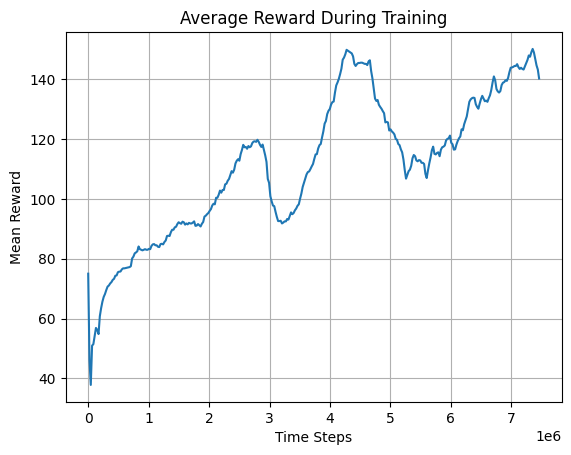

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Individual task/progress (4).csv')

# Set the figure size
#plt.rcParams["figure.figsize"] = [7.00, 3.50]
#plt.rcParams["figure.autolayout"] = True

# for the x and y-axis data
x_data = df['num_env_steps_trained']
y_data = df['episode_reward_mean']

# Plot the graph
plt.plot(x_data, y_data)
plt.xlabel('Time Steps')
plt.ylabel('Mean Reward')
plt.title('Average Reward During Training')
plt.grid(True)
plt.savefig("average_reward_rllib.pdf")
plt.savefig("average_reward_rllib.png")
plt.show()

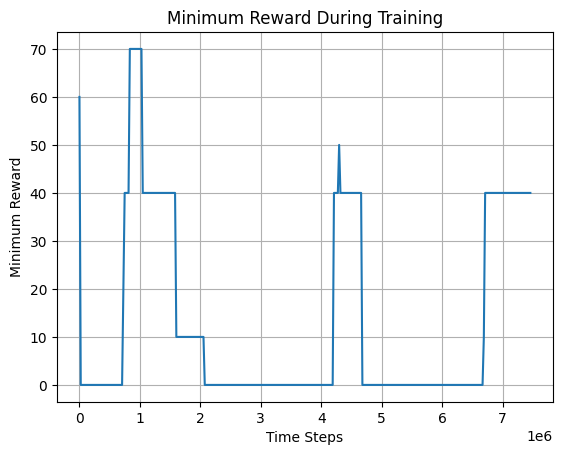

In [4]:
# Set the figure size
#plt.rcParams["figure.figsize"] = [7.00, 3.50]
#plt.rcParams["figure.autolayout"] = True

# for the x and y-axis data
x_data = df['num_env_steps_trained']
y_data = df['episode_reward_min']

# Plot the graph
plt.plot(x_data, y_data)
plt.xlabel('Time Steps')
plt.ylabel('Minimum Reward')
plt.title('Minimum Reward During Training')
plt.grid(True)
plt.savefig("min_reward_rllib.pdf")
plt.savefig("min_reward_rllib.png")
plt.show()

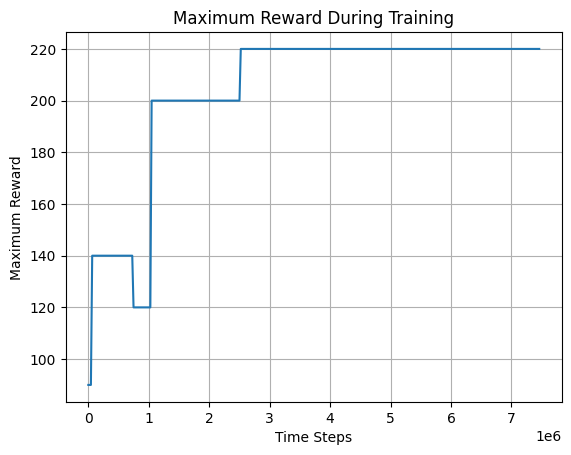

In [5]:
# Set the figure size
#plt.rcParams["figure.figsize"] = [7.00, 3.50]
#plt.rcParams["figure.autolayout"] = True

# for the x and y-axis data
x_data = df['num_env_steps_trained']
y_data = df['episode_reward_max']

# Plot the graph
plt.plot(x_data, y_data)
plt.xlabel('Time Steps')
plt.ylabel('Maximum Reward')
plt.title('Maximum Reward During Training')
plt.grid(True)
plt.savefig("max_reward_rllib.pdf")
plt.savefig("max_reward_rllib.png")
plt.show()